# 小象学院实践课程
## Numpy & Pandas
## Google工作数据

这个项目中，我们将处理以csv文件格式存储的数据。数据为从https://careers.google.com/ 爬取的google招聘职位需求。

Google是技术人员梦寐以求的工作圣地，想进入Google，需要什么样的条件？Google在哪些地区有招聘机会？我们一起探索。

> **提示**：这样的文字将会指导你如何使用 jupyter Notebook 来完成项目。你可以通过单击代码区域，然后使用键盘快捷键 Shift+Enter 或 Shift+Return 来运行代码。或者在选择代码后使用执行（run cell）按钮执行代码。Markdown的文字区域也同样可以如此操作。

> 在如下有**# TODO** 提示的地方，将代码补全，实现注释中所要求的功能。

> 在有"** 回答：**" 提示的地方，回答其上所提出的问题。

# 注：   标明 ###Q 的地方是我的问题

### 载入文件

我们尝试使用Pandas的read_csv载入数据，并查看前面的几行内容。

In [1]:
import pandas as pd
%matplotlib inline

In [2]:


file = "./data/job_skills.csv"

df = pd.read_csv(file)

df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


从天气数据样本中，我们可以看到数据的一些特征

- **Company**：公司名字，这里绝大部分是Google
- **Title**：工作头衔
- **Category**：职位类别
- **Location**：工作地点
- **Responsibilities**: 职责
- **Minimum Qualifications**：最低要求
- **Preferred Qualifications**：加分项

### 技能语言排名

尝试在Minimum Qualifications中，查找各编程语言出现的次数。

我们考察的语言包括python、java、c++、php、javascript、object-C、ruby、perl、c、c#、sql、swift、scala、r。

In [3]:
import re
# 定义语言列表
lang_list = ['python', 'java', 'c++', 'php', 'javascript', 'objective-c', 
             'ruby', 'perl', 'c', 'c#', 'sql', 'swift', 'scala', 'r']



# 定义统计函数，输入字符串，从中提取包含的‘python’、'java'等语言单词的次数
def lang_count(miniumum_qualifications_string, lang_dict):
    '''该函数被以下all_lang_count调用，统计lang_dict中已经有的key在miniumum_qualifications_string中出现的次数。
    
       输入：
           miniumum_qualifications_string：str类型，被查询的字符串（）
    '''
    # TODO->DONE
    # 从miniumum_qualifications_string中提取单词（可以参考Python正则表达式文档： https://docs.python.org/3/library/re.html）
    # 将如下re.sqlit中的第一个参数修改为正确的表达式
    for w in re.split(r'[^a-zA-Z0-9\+\-\#]', miniumum_qualifications_string):
        # TODO->DONE
        # 如果单词为lang_list中的某一种语言（注意单词大小写问题），将字典lang_dict对应项累加
        if w.lower() in lang_list: lang_dict[w.lower()] += 1
        
        

def all_lang_count(df):
    '''统计Minimum Qualifications列的内容中，语言出现的次数
    
       输入：
           df：DataFrame，其中包含Minimum Qualifications列。
    
       输出：
           字典类型，其中key为语言名字如'python'、'java'等，value为单词在Minimum Qualifications中出现的次数。
    '''
    # TODO->DONE
    # 初始化字典变量lang_dict, 以lang_list中的语言名字为key，出现次数为0
    lang_dict = dict()
    for lang in lang_list:
        if lang.lower() in lang_dict: continue #字典对python/Python视为一个
        else: lang_dict[lang] = 0
    # 对于Minimum Qualifications列中的每一项，调用lang_count方法
    for word in df['Minimum Qualifications']:
        lang_count(str(word), lang_dict)
    
    return lang_dict

lang_dict = all_lang_count(df)

print(lang_dict)

{'python': 97, 'java': 76, 'c++': 54, 'php': 7, 'javascript': 77, 'objective-c': 3, 'ruby': 14, 'perl': 6, 'c': 18, 'c#': 15, 'sql': 73, 'swift': 0, 'scala': 0, 'r': 37}


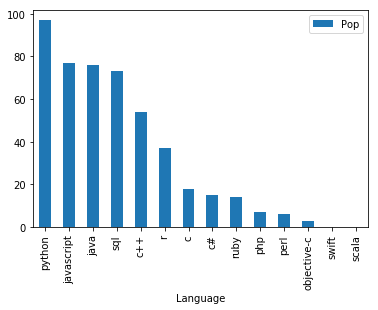

In [4]:
# TODO->DONE
# 对lang_dict.items()按照value所对应项进行排序并生成到新的列表变量lang_sorted中
lang_sorted = sorted(lang_dict.items(),key=lambda x:x[1],reverse=True)

# 根据计算出的lang_sorted生成新的DataFrame
df_lang_sorted = pd.DataFrame(lang_sorted, columns = ['Language', 'Pop'])

# TODO->DONE
# 将Language设置为df_lang_sorted的index以便绘图时作为横坐标标签
df_lang_sorted.set_index(["Language"],inplace=True)

# 绘制df_lang_sorted柱形图
df_lang_sorted.plot.bar()


从图形结果当中，我们可以看到，需求量排名前三的语言是哪些？

python javascript java

### 更仔细的探索数据

对数据进行初步的统计得到以上结果，看起来比较惊喜。

让我们仔细看看一些数据的细节。

首先，检查下数据中包含多少空值。

In [5]:
pd.isnull(df).sum(axis=0)  #默认是axis=0

Company                      0
Title                        0
Category                     0
Location                     0
Responsibilities            15
Minimum Qualifications      14
Preferred Qualifications    14
dtype: int64

#### 去除空值项

In [6]:
df = df.dropna()
df.describe()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
count,1235,1235,1235,1235,1235,1235,1235
unique,2,779,23,91,801,806,820
top,Google,Business Intern 2018,Sales & Account Management,"Mountain View, CA, United States",Responsibilities and detailed projects will be...,Must be pursuing a full-time MBA program with ...,"Previous internship experience in Sales, Adver..."
freq,1212,35,168,187,33,32,32


#### 观察一下Company列

在执行df.head结果之后，我们可以发现Company列中的unique为2，这里除了Google，还有另外一家公司。

看看另一家是什么：

In [7]:
df['Company'].value_counts()#相当于series的方法,返回表示每类值数量的series数组

Google     1212
YouTube      23
Name: Company, dtype: int64

可以看到这里还有一家是YouTube，也是被Google收购了的金牌雇主。

为了分析，先不管这么多，把YouTube相关的行数据去掉。

In [3]:
# TODO->DONE
# 去掉df中Company列为YouTube的数据
cond_isgoogle = df['Company']=="Google"
df = df[cond_isgoogle]
#检查是否去掉了
df['Company'].value_counts()
#df.describe()

Google    1227
Name: Company, dtype: int64

#### 观察其它列的大概状况

In [9]:
# Title列
df['Title'].value_counts()

Business Intern 2018                                                              35
MBA Intern, Summer 2018                                                           34
MBA Intern 2018                                                                   28
BOLD Intern, Summer 2018                                                          21
Field Sales Representative, Google Cloud                                          17
Interaction Designer                                                              12
User Experience Researcher                                                         9
Partner Sales Engineer, Google Cloud                                               7
User Experience Design Intern, Summer 2018                                         7
Recruiter                                                                          7
Deal Manager, Google Cloud                                                         6
User Experience Research Intern, Summer 2018                     

In [10]:
# TODO->DONE
# 使用value_counts观察Location列的统计状况，注意，只列出前20项
df['Location'].value_counts()[0:20]

Mountain View, CA, United States    187
Sunnyvale, CA, United States        155
Dublin, Ireland                      87
New York, NY, United States          68
London, United Kingdom               61
San Francisco, CA, United States     49
Singapore                            39
Tokyo, Japan                         31
Sydney, Australia                    31
Seattle, WA, United States           27
Shanghai, China                      27
Xinyi District, Taiwan               24
München, Germany                     23
Zürich, Switzerland                  22
Paris, France                        20
San Bruno, CA, United States         17
Austin, TX, United States            17
Boulder, CO, United States           15
Kirkland, WA, United States          14
São Paulo, Brazil                    13
Name: Location, dtype: int64

In [11]:
# TODO->DONE
# 使用value_counts观察Category列的统计状况，注意，只列出前20项
df['Category'].value_counts()[0:20]

Sales & Account Management          167
Marketing & Communications          161
Finance                             112
Technical Solutions                 100
Business Strategy                    92
People Operations                    86
User Experience & Design             83
Program Management                   72
Partnerships                         58
Product & Customer Support           48
Legal & Government Relations         43
Administrative                       39
Sales Operations                     31
Software Engineering                 24
Real Estate & Workplace Services     24
Hardware Engineering                 22
Manufacturing & Supply Chain         16
Technical Infrastructure             11
Network Engineering                   6
IT & Data Management                  5
Name: Category, dtype: int64

### 工作年限

#### 粗略计算

In [12]:
from collections import defaultdict

# 使用defaultdict构建value默认值为0的字典
years_exp = defaultdict(lambda: 0)

# 定义统计函数，输入字符串，从中提取包含的xxx year字样的情况下期中xxx所描述的数字
def compute_years_exp(miniumum_qualifications_string):
    # 从miniumum_qualifications_string中提取xxx year中的xxx（可以参考Python正则表达式文档： https://docs.python.org/3/library/re.html）
    # 然后以年数（xxx）为key，将years_exp中的相应元素value加1。
    for w in re.findall(r'([0-9]+) year', miniumum_qualifications_string):
        years_exp[w] += 1
        
# 对于Minimum Qualifications列中的每一项，调用lang_count方法
for word in df['Minimum Qualifications']:
    compute_years_exp(str(word))
    
print(dict(years_exp))


{'3': 111, '7': 41, '2': 60, '1': 16, '4': 91, '10': 75, '5': 174, '12': 18, '8': 62, '6': 56, '9': 8, '15': 4, '13': 1, '11': 1, '14': 1}


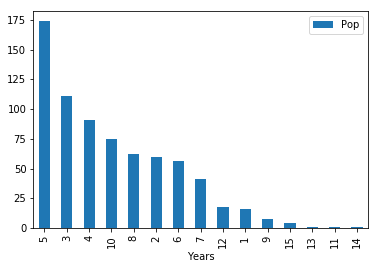

In [13]:
# TODO->DONE
# 对dict(years_exp)按照value进行排序并生成到新的列表变量years_exp_sorted中
years_exp_sorted = sorted(years_exp.items(), key=lambda x:x[1],reverse=True)

# TODO->DONE
# 根据计算出的years_exp_sorted生成新的DataFrame，列名为Years以及Pop
df_years_exp_sorted = pd.DataFrame(years_exp_sorted, columns = ['Years','Pop'])

# TODO->DONE
# 将Years设置为df_years_exp_sorted的index以便绘图时作为横坐标标签
df_years_exp_sorted.set_index(['Years'],inplace=True)

# 绘制df_years_exp_sorted柱形图
df_years_exp_sorted.plot.bar()


从图形结果当中，我们可以看到，需求量排名前二的工作经验年限是什么？

5 and 3

#### 逐行处理

针对每一行，生成一个新列Minimum_years_experience，从当前行的Minimum Qualifications列中，提取xxx year 字样前面的xxx

In [14]:
# TODO
# 生成df['Minimum_years_experience']，每行元素为对应行的Minimum Qualifications这列中xxx year 字样前面的xxx。
# df['Minimum_years_experience']每个元素的类型为列表

def func(row):
    return re.findall(r'([0-9]+) year', row['Minimum Qualifications'])

df['Minimum_years_experience'] = df.apply(func,axis=1) #可以直接新建一列，以df[Name]=None的方式
df.head()



,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,Minimum_years_experience
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,[3]
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",[7]
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,"[2, 1, 1]"
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",[]
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,[4]


从结果中，我们可以看出，某些行会提取出多个数字，某些行却一个数字也提取不出来，需要做进一步处理。

#### 空值填充

将df['Minimum_years_experience']中的[]转换成[0]

In [15]:
# TODO->DONE
# 将df['Minimum_years_experience']中的[]转换成[0]，（提示：可以使用apply）
def func2(elem):
    if len(elem) == 0: return 0
    else: return elem
df['Minimum_years_experience'] = df['Minimum_years_experience'].apply(func2)

df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,Minimum_years_experience
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,[3]
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",[7]
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,"[2, 1, 1]"
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",0
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,[4]


#### 处理多值

当df['Minimum_years_experience']中出现多个元素时，比如[x, y, z]，将df['Minimum_years_experience']转换成[max(x, y, z)]

In [16]:
# TODO->DONE
# 当df['Minimum_years_experience']中出现多个元素时，比如[x, y, z]，将df['Minimum_years_experience']转换成[max(x, y, z)]
#我这里直接去掉了列表，以整值形式返回
def func3(elem):
    if type(elem)==list and len(elem)>1: 
        elem = [int(x) for x in elem]
        return max(elem)
    elif type(elem)==list: return int(elem[0])
    else: return elem
    
df['Minimum_years_experience'] = df['Minimum_years_experience'].apply(func3)

df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,Minimum_years_experience
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,3
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",7
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,2
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",0
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,4


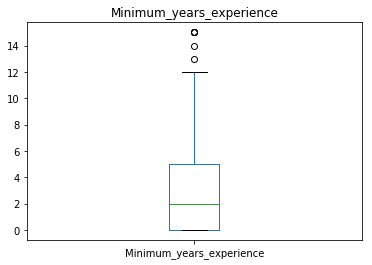

In [17]:
# TODO->DONE
# 基于df['Minimum_years_experience']数据，绘制箱线图。
# 注意：如果元素类型非数值类型，绘制箱线图会失败，需要使用astype对元素类型进行转换。
df_new = df['Minimum_years_experience'].astype(int)  ###Q: 明明在上面我都转换成int返回了为什么这里还要用astype转换啊？
df_new.plot(kind='box',title='Minimum_years_experience')

从箱线图结果看，需求的工作年限的中位数是多少？

2

### 查看分析师岗位相关数据

我们从Title中查找包含'Analyst'关键字的职位需求。

In [18]:
# TODO->DONE
# 从Title中查找包含'Analyst'关键字的职位，存储到df_Analyst中。
def func4(elem):
    if elem.find('Analyst') != -1: return True
    else: return False

cond_hasAnalyst = df['Title'].apply(func4)
df_Analyst = df[cond_hasAnalyst]  #这个操作实际上是去掉了Title不含Analyst的样本

df_Analyst.head() ###Q:前面的索引是原来的索引，怎么换成从0开始？

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,Minimum_years_experience
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,2
10,Google,"Data Analyst, Consumer Hardware",Product & Customer Support,"Mountain View, CA, United States",Build and maintain the Support Operations Anal...,"BA/BS degree in Computer Science, Engineering,...",Experience in designing and executing structur...,4
20,Google,"Quantitative Analyst, Ads Quality",Product & Customer Support,"Zürich, Switzerland",Apply advanced statistical methods and work wi...,PhD in Statistics or Econometrics or a related...,Relevant industry or research experience.\nFam...,0
85,Google,"Quantitative Analyst Lead, Trust and Safety",Product & Customer Support,"Zürich, Switzerland",Partner with cross-functional stakeholders to ...,"PhD degree in Statistics, Econometrics, relate...",Relevant and extensive PhD research or work ex...,0
182,Google,"Quantitative Analyst, Trust and Safety",Product & Customer Support,"Zürich, Switzerland",Work with data sets and solve non-routine anal...,Master's degree in a quantitative discipline o...,PhD in a quantitative discipline.\nExperience ...,0


In [19]:
# 查看下分析师需求的位置分布情况
df_Analyst['Location'].value_counts()

Mountain View, CA, United States    18
Sunnyvale, CA, United States        16
Zürich, Switzerland                  6
Dublin, Ireland                      5
London, United Kingdom               4
San Bruno, CA, United States         2
New York, NY, United States          2
Kirkland, WA, United States          1
Hyderabad, India                     1
Paris, France                        1
Tokyo, Japan                         1
Seattle, WA, United States           1
Singapore                            1
Tel Aviv-Yafo, Israel                1
Hamburg, Germany                     1
Beijing, China                       1
Name: Location, dtype: int64

#### 添加国家信息

在位置信息中，最后一个逗号后面为国家名，我们对Location进一步分组。

在df_Analyst中生成一个新列'Country'，从Location中，将最后一个逗号后面的值提取出来，作为该列的值。

In [20]:
# TODO->DONE
# 生成新列df_Analyst['Country']，其中内容为df_Analyst['Location']中截取最后一个逗号之后的内容
new_country = df_Analyst['Location'].str.split(',',1,True)[1]

df_Analyst['Country'] = new_country

df_Analyst['Country'].value_counts()
df_Analyst

/Users/apple/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,Minimum_years_experience,Country
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,2,"NY, United States"
10,Google,"Data Analyst, Consumer Hardware",Product & Customer Support,"Mountain View, CA, United States",Build and maintain the Support Operations Anal...,"BA/BS degree in Computer Science, Engineering,...",Experience in designing and executing structur...,4,"CA, United States"
20,Google,"Quantitative Analyst, Ads Quality",Product & Customer Support,"Zürich, Switzerland",Apply advanced statistical methods and work wi...,PhD in Statistics or Econometrics or a related...,Relevant industry or research experience.\nFam...,0,Switzerland
85,Google,"Quantitative Analyst Lead, Trust and Safety",Product & Customer Support,"Zürich, Switzerland",Partner with cross-functional stakeholders to ...,"PhD degree in Statistics, Econometrics, relate...",Relevant and extensive PhD research or work ex...,0,Switzerland
182,Google,"Quantitative Analyst, Trust and Safety",Product & Customer Support,"Zürich, Switzerland",Work with data sets and solve non-routine anal...,Master's degree in a quantitative discipline o...,PhD in a quantitative discipline.\nExperience ...,0,Switzerland
193,Google,"Operations Analyst, Sales, Google Cloud",Program Management,"Sunnyvale, CA, United States",Lead and manage global analytical projects acr...,BA/BS degree or equivalent practical experienc...,MBA or Master's degree.\nExperience developing...,5,"CA, United States"
234,Google,"Sales Analyst, Google Cloud",Program Management,"Sunnyvale, CA, United States","Serve as sales operations contact for Apigee, ...",Salesforce Administrator Certification\n3 year...,"Bachelor's degree, other business relevant qua...",3,"CA, United States"
304,Google,"Data Analyst, Consumer Hardware",Product & Customer Support,"Mountain View, CA, United States",Build and maintain the Support Operations Anal...,"BA/BS degree in Computer Science, Engineering,...",Experience in designing and executing structur...,4,"CA, United States"
316,Google,"Quantitative Analyst, Ads Quality",Product & Customer Support,"Zürich, Switzerland",Apply advanced statistical methods and work wi...,PhD in Statistics or Econometrics or a related...,Relevant industry or research experience.\nFam...,0,Switzerland
329,Google,"Data Analyst, Product Trust and Safety",Product & Customer Support,"Hyderabad, India",Excel at product policy enforcement on known s...,"Bachelor's degree in Engineering or Sciences, ...","BA/BS in Computer Science, Mathematics, Statis...",2,India


需求量排在前4的国家都是那些？<br>
CA, United States<br>
Switzerland<br>
Ireland<br>
United Kingdom<br>


#### 统计数据分析师的语言技能需求



In [21]:
print(all_lang_count(df_Analyst))

{'python': 13, 'java': 1, 'c++': 1, 'php': 0, 'javascript': 0, 'objective-c': 0, 'ruby': 0, 'perl': 0, 'c': 0, 'c#': 0, 'sql': 27, 'swift': 0, 'scala': 0, 'r': 17}


对于数据分析师，哪种语言的要求最高？

sql

#### 透视表

构建透视表，探寻不同国家对于数据分析师的工作年限需求。

透视表index为二级索引，第一级是国家（'Country'），第二级是职位分类（'Category'）,values是'Minimum_years_experience'。当生成表时出现元素冲突时，定义mean为aggfunc。

In [22]:
import numpy as np
# TODO->DONE
# 定义透视表category_country，以df_Analyst的Country和Category为二级索引，Minimum_years_experience为value，aggfunc为mean
df_Analyst['Minimum_years_experience'] = df_Analyst['Minimum_years_experience'].astype(int)
category_country = df_Analyst.pivot_table(index=['Country','Category'],values='Minimum_years_experience',aggfunc=np.mean,fill_value="Unknown")

category_country

/Users/apple/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Minimum_years_experience
Country            Category                                              
 CA, United States Business Strategy                             4.769231
                   Finance                                       3.875000
                   Legal & Government Relations                  4.000000
                   Marketing & Communications                    2.750000
                   People Operations                             1.666667
                   Product & Customer Support                    3.333333
                   Program Management                            4.000000
                   Sales Operations                              2.000000
 China             Partnerships                                  2.000000
 France            Sales Operations                              0.000000
 Germany           Sales Operations                              0.000000
 India             Product & Customer Support                    2.000000
 Ireland           Finance                                       0.000000
                   Legal & Government Relations                  0.000000
                   Product & Customer Support                    0.000000
                   Sales & Account Management                    0.000000
 Israel            Business Strategy                             0.000000
 Japan             Business Strategy                             0.000000
 NY, United States People Operations                             0.000000
                   Technical Solutions                           2.000000
 Switzerland       Product & Customer Support                    0.000000
 United Kingdom    Finance                                       0.000000
                   Marketing & Communications                    0.000000
                   Sales Operations                              0.000000
 WA, United States Business Strategy                             3.000000

中国的职位需求中，其对应的Category是什么？要求的最低工作年限是多少？<br>
Partnerships	<br>
2
